In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

#Appling Algorithms
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [137]:
#read the data
train_data= pd.read_csv('/content/fraudTrain.csv')

In [138]:
#check the data
print("Credit Card Fraud Detection data -  rows:",train_data.shape[0]," columns:", train_data.shape[1])

Credit Card Fraud Detection data -  rows: 476783  columns: 23


In [139]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476783 entries, 0 to 476782
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             476783 non-null  int64  
 1   trans_date_trans_time  476783 non-null  object 
 2   cc_num                 476783 non-null  int64  
 3   merchant               476783 non-null  object 
 4   category               476783 non-null  object 
 5   amt                    476783 non-null  float64
 6   first                  476783 non-null  object 
 7   last                   476783 non-null  object 
 8   gender                 476783 non-null  object 
 9   street                 476783 non-null  object 
 10  city                   476783 non-null  object 
 11  state                  476783 non-null  object 
 12  zip                    476783 non-null  int64  
 13  lat                    476783 non-null  float64
 14  long                   476783 non-nu

In [141]:
#pd.set_option("display.float", "{:.2f}".format)
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,476783.000000,4.767830e+05,476783.000000,476783.000000,476783.000000,476783.000000,4.767830e+05,4.767820e+05,476782.000000,476782.000000,476782.000000
mean,238391.000000,4.162670e+17,70.539478,48748.519920,38.536344,-90.197984,8.939038e+04,1.335348e+09,38.535438,-90.198263,0.006187
std,137635.541035,1.307423e+18,160.141146,26910.696818,5.072835,13.760458,3.037565e+05,5.132582e+06,5.106769,13.772795,0.078416
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,119195.500000,1.800365e+14,9.650000,26041.000000,34.668900,-96.790900,7.430000e+02,1.331219e+09,34.739061,-96.867794,0.000000
50%,238391.000000,3.519607e+15,47.560000,48154.000000,39.354300,-87.458100,2.456000e+03,1.335711e+09,39.364265,-87.399014,0.000000
75%,357586.500000,4.642255e+15,83.280000,72011.000000,41.940400,-80.128400,2.047800e+04,1.339828e+09,41.953893,-80.202622,0.000000
max,476782.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.343485e+09,67.510267,-66.956540,1.000000


In [142]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [144]:
train_data.isnull().sum().sum()

5

In [145]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [146]:
# frac is percentage of the data that will be returned
train_data = train_data.sample(frac = 0.2, random_state = 1)
print(train_data.shape)

(95357, 23)


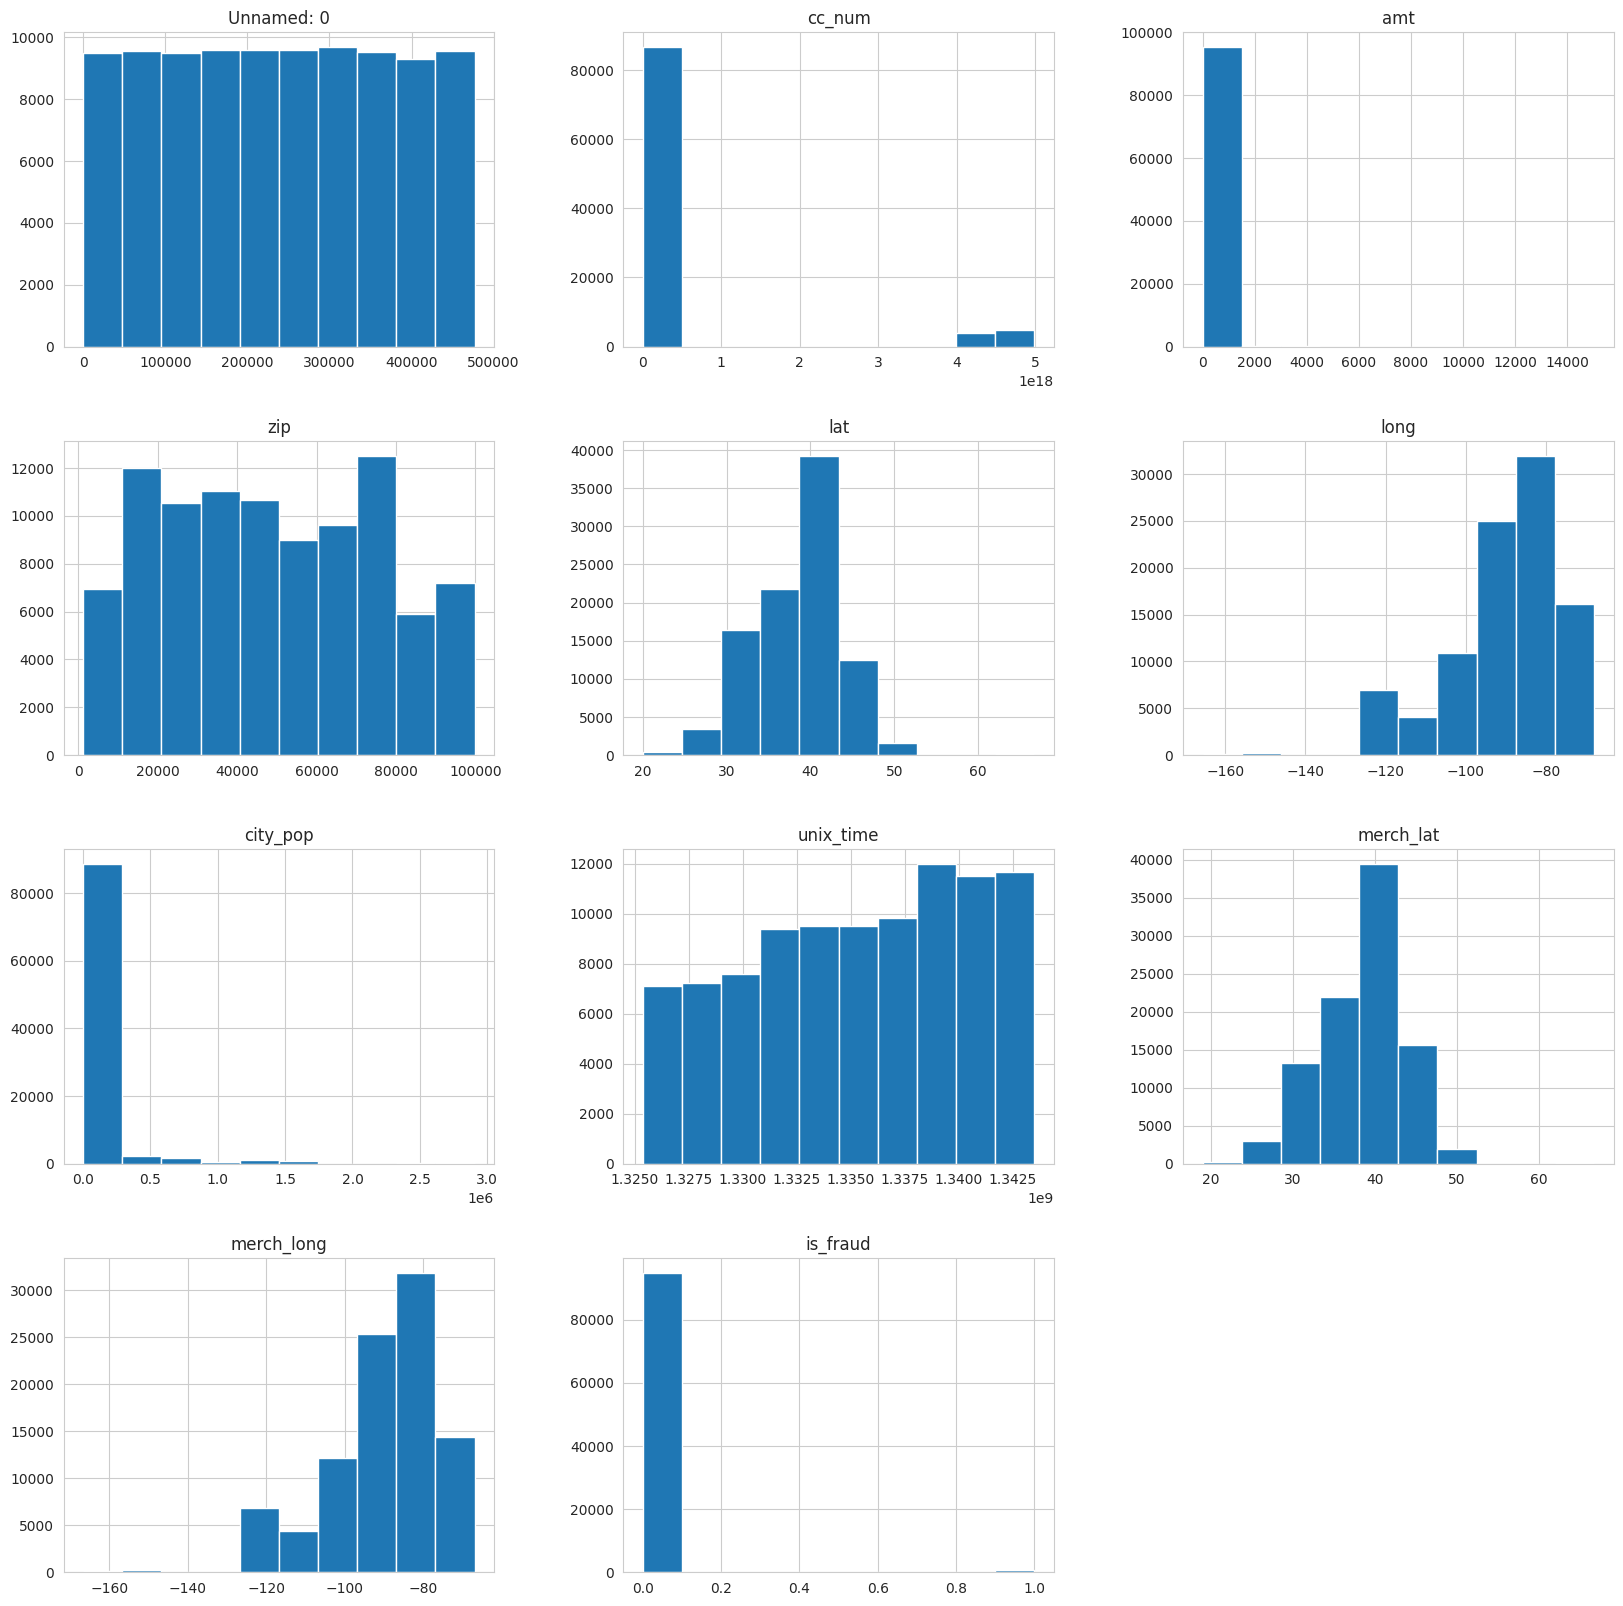

In [147]:
# plot the histogram of each parameter
train_data.hist(figsize = (20, 20))
plt.show()

In [148]:
#Preprocessing
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
176959,176959,2019-04-02 11:38:23,4670613943676271,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,104.02,Bianca,Novak,F,0953 David Skyway,...,31.7706,-84.7936,5726,Fitness centre manager,1947-08-14,e86788f88d18f493032aaaf01f8c615f,1.333367e+09,32.374194,-84.675777,0.0
11500,11500,2019-01-07 19:01:47,180094419304907,fraud_Gleason-Macejkovic,shopping_net,1323.74,Sharon,Smith,F,17666 David Valleys,...,33.7467,-117.1721,54287,"Designer, exhibition/display",1972-09-22,588f41a83ab3a3f9ef059f9d0d425cab,1.325963e+09,34.394362,-116.940110,0.0
434642,434642,2019-07-13 18:24:15,180067784565096,"fraud_Cole, Hills and Jewess",home,11.98,Mary,Juarez,F,35440 Ryan Islands,...,42.9385,-88.3950,2328,Applications developer,1942-01-06,a4273f4bd71a9831f228b859d331ceef,1.342204e+09,42.165301,-87.495967,0.0
72861,72861,2019-02-12 12:10:53,676369110710,"fraud_Yost, Schamberger and Windler",kids_pets,26.11,David,Wolfe,M,81261 Garcia Underpass Suite 741,...,42.4969,-83.2911,75830,"Engineer, automotive",1974-12-28,8e5b4758af71ce3371192a6b5265f8f5,1.329049e+09,42.637674,-82.499553,0.0
347704,347704,2019-06-12 14:50:36,3573030041201292,"fraud_Schroeder, Hauck and Treutel",entertainment,48.41,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,071e8553ebe313bf912e371e2a282b76,1.339513e+09,40.191740,-109.733148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393641,393641,2019-06-29 08:58:58,341546199006537,"fraud_Welch, Rath and Koepp",entertainment,58.20,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,7d4369b92f0310b24ce7c90d9077d52d,1.340960e+09,64.339133,-165.365278,0.0
297556,297556,2019-05-25 23:25:06,30234966027947,fraud_Eichmann-Kilback,home,24.31,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,...,43.9446,-88.0911,5196,Child psychotherapist,1978-01-22,33f49d32f7144abcc8436336676eb104,1.337988e+09,44.579649,-88.013501,0.0
154234,154234,2019-03-23 22:55:39,5456776410929288,fraud_Padberg-Sauer,home,14.67,Taylor,Khan,F,658 Diane Glen Apt. 677,...,41.0472,-79.8089,139,Patent attorney,1954-05-25,cbf89a21faace0627ff4577c47bb45fb,1.332543e+09,41.900924,-80.391243,0.0
448362,448362,2019-07-18 15:28:47,4906628655840914250,fraud_Halvorson Group,misc_pos,3.81,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891,Town planner,1987-02-13,805525606033e2e447024e1d8b28974a,1.342625e+09,25.287690,-82.204504,0.0


In [149]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
176959,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,104.02,F,31.7706,-84.7936,5726,Fitness centre manager,1.333367e+09,32.374194,-84.675777,0.0
11500,fraud_Gleason-Macejkovic,shopping_net,1323.74,F,33.7467,-117.1721,54287,"Designer, exhibition/display",1.325963e+09,34.394362,-116.940110,0.0
434642,"fraud_Cole, Hills and Jewess",home,11.98,F,42.9385,-88.3950,2328,Applications developer,1.342204e+09,42.165301,-87.495967,0.0
72861,"fraud_Yost, Schamberger and Windler",kids_pets,26.11,M,42.4969,-83.2911,75830,"Engineer, automotive",1.329049e+09,42.637674,-82.499553,0.0
347704,"fraud_Schroeder, Hauck and Treutel",entertainment,48.41,F,40.3207,-110.4360,302,"Sales professional, IT",1.339513e+09,40.191740,-109.733148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393641,"fraud_Welch, Rath and Koepp",entertainment,58.20,M,64.7556,-165.6723,145,"Administrator, education",1.340960e+09,64.339133,-165.365278,0.0
297556,fraud_Eichmann-Kilback,home,24.31,M,43.9446,-88.0911,5196,Child psychotherapist,1.337988e+09,44.579649,-88.013501,0.0
154234,fraud_Padberg-Sauer,home,14.67,F,41.0472,-79.8089,139,Patent attorney,1.332543e+09,41.900924,-80.391243,0.0
448362,fraud_Halvorson Group,misc_pos,3.81,M,24.6557,-81.3824,32891,Town planner,1.342625e+09,25.287690,-82.204504,0.0


In [150]:
#Drop all rows that contain missing values
train_data.dropna(inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
176959,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,104.02,F,31.7706,-84.7936,5726,Fitness centre manager,1.333367e+09,32.374194,-84.675777,0.0
11500,fraud_Gleason-Macejkovic,shopping_net,1323.74,F,33.7467,-117.1721,54287,"Designer, exhibition/display",1.325963e+09,34.394362,-116.940110,0.0
434642,"fraud_Cole, Hills and Jewess",home,11.98,F,42.9385,-88.3950,2328,Applications developer,1.342204e+09,42.165301,-87.495967,0.0
72861,"fraud_Yost, Schamberger and Windler",kids_pets,26.11,M,42.4969,-83.2911,75830,"Engineer, automotive",1.329049e+09,42.637674,-82.499553,0.0
347704,"fraud_Schroeder, Hauck and Treutel",entertainment,48.41,F,40.3207,-110.4360,302,"Sales professional, IT",1.339513e+09,40.191740,-109.733148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393641,"fraud_Welch, Rath and Koepp",entertainment,58.20,M,64.7556,-165.6723,145,"Administrator, education",1.340960e+09,64.339133,-165.365278,0.0
297556,fraud_Eichmann-Kilback,home,24.31,M,43.9446,-88.0911,5196,Child psychotherapist,1.337988e+09,44.579649,-88.013501,0.0
154234,fraud_Padberg-Sauer,home,14.67,F,41.0472,-79.8089,139,Patent attorney,1.332543e+09,41.900924,-80.391243,0.0
448362,fraud_Halvorson Group,misc_pos,3.81,M,24.6557,-81.3824,32891,Town planner,1.342625e+09,25.287690,-82.204504,0.0


In [151]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [152]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
176959,673,9,104.02,0,31.7706,-84.7936,5726,195,1.333367e+09,32.374194,-84.675777,0.0
11500,193,11,1323.74,0,33.7467,-117.1721,54287,118,1.325963e+09,34.394362,-116.940110,0.0
434642,95,6,11.98,0,42.9385,-88.3950,2328,26,1.342204e+09,42.165301,-87.495967,0.0
72861,683,7,26.11,1,42.4969,-83.2911,75830,151,1.329049e+09,42.637674,-82.499553,0.0
347704,567,0,48.41,0,40.3207,-110.4360,302,394,1.339513e+09,40.191740,-109.733148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393641,662,0,58.20,1,64.7556,-165.6723,145,8,1.340960e+09,64.339133,-165.365278,0.0
297556,155,6,24.31,1,43.9446,-88.0911,5196,78,1.337988e+09,44.579649,-88.013501,0.0
154234,471,6,14.67,0,41.0472,-79.8089,139,319,1.332543e+09,41.900924,-80.391243,0.0
448362,225,9,3.81,1,24.6557,-81.3824,32891,461,1.342625e+09,25.287690,-82.204504,0.0


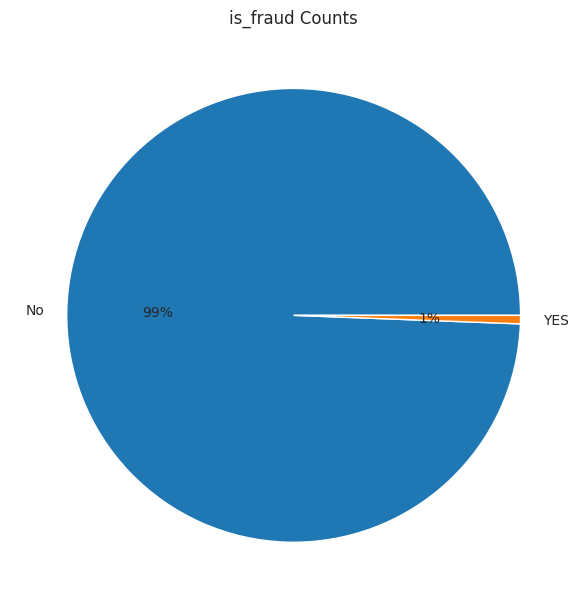

In [153]:
#EDA
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [154]:
#Train the model
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [172]:
model=RandomForestClassifier()
model.fit(X, Y)

RandomForestClassifier()

In [173]:
model.score(X, Y)

1.0

In [174]:
#Test the data
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422529,422529,2020-12-02 01:28:00,3527063666782582,"fraud_Zboncak, Rowe and Murazik",shopping_net,8.38,Amanda,Alexander,F,21810 James Mall,...,30.9000,-94.7547,99,Colour technologist,1965-11-21,5d1bf0607285304f48cdf77f34a94113,1.385948e+09,30.233411,-94.961304,0.0
422530,422530,2020-12-02 01:28:14,2248348993063230,"fraud_Greenholt, Jacobi and Gleason",gas_transport,40.96,Jennifer,Scott,F,376 John Fork Suite 848,...,41.0109,-81.2977,51,Mechanical engineer,1960-08-05,cb7c8818a2fbc15fbb1fe6c2844a9157,1.385948e+09,40.533666,-80.486635,0.0
422531,422531,2020-12-02 01:28:41,3567879740649740,"fraud_Schaefer, McGlynn and Bosco",gas_transport,36.31,Tanya,Williams,F,566 Megan Well,...,44.0577,-76.0196,1271,"Producer, radio",1958-08-14,3c19931b14cf2b736f51e3d52114e62e,1.385948e+09,44.014530,-76.326290,0.0
422532,422532,2020-12-02 01:29:39,4826655832045236,fraud_Marks Inc,gas_transport,74.94,Tami,Forbes,F,5204 Robinson Plaza Suite 897,...,41.6983,-70.3001,1850,Counselling psychologist,1963-12-29,3ccc763eac4c5a1cac8bb39218820d76,1.385948e+09,40.698863,-69.820543,0.0


In [175]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
422529,"fraud_Zboncak, Rowe and Murazik",shopping_net,8.38,F,30.9000,-94.7547,99,Colour technologist,1.385948e+09,30.233411,-94.961304,0.0
422530,"fraud_Greenholt, Jacobi and Gleason",gas_transport,40.96,F,41.0109,-81.2977,51,Mechanical engineer,1.385948e+09,40.533666,-80.486635,0.0
422531,"fraud_Schaefer, McGlynn and Bosco",gas_transport,36.31,F,44.0577,-76.0196,1271,"Producer, radio",1.385948e+09,44.014530,-76.326290,0.0
422532,fraud_Marks Inc,gas_transport,74.94,F,41.6983,-70.3001,1850,Counselling psychologist,1.385948e+09,40.698863,-69.820543,0.0


In [177]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [178]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
422529,687,11,8.38,0,30.9000,-94.7547,99,87,1.385948e+09,30.233411,-94.961304,0.0
422530,208,2,40.96,0,41.0109,-81.2977,51,275,1.385948e+09,40.533666,-80.486635,0.0
422531,549,2,36.31,0,44.0577,-76.0196,1271,342,1.385948e+09,44.014530,-76.326290,0.0
422532,407,2,74.94,0,41.6983,-70.3001,1850,106,1.385948e+09,40.698863,-69.820543,0.0


In [179]:

# Update the X_test with the processed test data
X_test = test_data

In [188]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [181]:
# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# If there are missing values, impute them
if missing_values.any():
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="mean")
    X_test = imputer.fit_transform(X_test)

# Predict using the imputed data
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [185]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [186]:
len(y_pred)

422534

In [189]:
# Replace the line with the following:
y_pred = model.predict(X_test.fillna(0))

In [ ]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy